# **Introduction**

In this case study, we have created models that can automatically classify customer complaints based on the products and services that the ticket mentions.

## **Understanding Problem Statement**

For a financial company, customer complaints carry a lot of importance, as they are often an indicator of the shortcomings in their products and services. If these complaints are resolved efficiently in time, they can bring down customer dissatisfaction to a minimum and retain them with stronger loyalty. This also gives them an idea of how to continuously improve their services to attract more customers.



These customer complaints are unstructured text data; so, traditionally, companies need to allocate the task of evaluating and assigning each ticket to the relevant department to multiple support employees. This becomes tedious as the company grows and has a large customer base.



In this case study, you will be working as an NLP engineer for a financial company that wants to automate its customer support tickets system. As a financial company, the firm has many products and services such as credit cards, banking and mortgages/loans.

## **Business goal**



We need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF <b> Non-Negative Matrix Factorization </b> to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.


##### **Pipelines that needs to be performed:**

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading
2. Text preprocessing
3. Exploratory data analysis (EDA)
4. Feature extraction
5. Topic modelling
6. Model building using supervised learning
7. Model training and evaluation
8. Model inference

In [ ]:
# unstructured data >> structured >> text preprocessing / cleaning >> NMF >> train the model >> testing >> prediction

In [ ]:
# Data Source
# https://drive.google.com/file/d/1GuLksLp2N3bXCSLRDH2I7xRxwBZs5cA4/view?usp=drive_link

In [ ]:
# Import reauired libraries
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

#nlp package
import en_core_web_sm
nlp = en_core_web_sm.load()
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# format the notebook
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# pip installs
! pip install wordcloud


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# open the json file and return JSON object as dictionary
data = json.load(open('/content/drive/MyDrive/Datasets/Input/ticket_complaints.json'))

# coverting the json to dataframe
df = pd.json_normalize(data)

# data sample
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [ ]:
# data volumne
df.shape

(78313, 22)

In [ ]:
# columns of the data
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [ ]:
# extracting the needful columns
data =df[['_source.complaint_what_happened', '_source.product', '_source.sub_product']]

# data sample
data.head()

,_source.complaint_what_happened,_source.product,_source.sub_product
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [ ]:
# renaming the columns
data.rename(columns={'_source.complaint_what_happened':'complaint_text',
                     '_source.product': 'category',
                     '_source.sub_product': 'sub_category'},
            inplace=True)

# data sample after renaming
data.head()

# we have retained product and sub product for verification purpose. This wont be used in topic modelling.

,complaint_text,category,sub_category
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [ ]:
# merging the category and sub category
data['category'] = data['category'] + '+' + data['sub_category']
data.drop('sub_category', axis=1, inplace=True)
data.head()

,complaint_text,category
0,,Debt collection+Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection+Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card+General-purpose cr...
3,,Mortgage+Conventional home mortgage
4,,Credit card or prepaid card+General-purpose cr...


In [ ]:
# missing values
data.isnull().sum()

,0
complaint_text,0
category,10571


In [ ]:
# checking the empty strings
print('Empty stings before filter:',len(data[data['complaint_text'] == '']))

# retain only the data which is not a empty string
data = data[data['complaint_text'] != '']

# checking the empty strings
print('Empty stings after filter:',len(data[data['complaint_text'] == '']))

# missing values
data.isnull().sum()

Empty stings before filter: 57241
Empty stings after filter: 0


,0
complaint_text,0
category,2109


In [ ]:
# data volume
data.shape

(21072, 2)

### **Prepare the text for topic modeling**

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Use POS tags to get relevant words from the texts.


In [ ]:
# function to clean the text
def clean_text(text):
    text = text.lower()    # lower case
    text = re.sub('\[\S+\]', '', text).strip()    # remove text in square bracket
    text = text.translate(str.maketrans('', '', string.punctuation))     # remove punctuation
    text = re.sub('\S*\d\S*', '', text).strip()   # remove words containing the number
    text = re.sub(r'\b\w*xx\w*\b', '', text).strip()  # remove PII data
    return text.strip()

In [ ]:
# apply the function to the complaint text
data['complaint_text'] = data['complaint_text'].apply(lambda x: clean_text(x))

# data after cleaning
data.head()

,complaint_text,category
1,good morning my name is and i appreciate it ...,Debt collection+Credit card debt
2,i upgraded my card in and was told by the a...,Credit card or prepaid card+General-purpose cr...
10,chase card was reported on however fraudulent...,"Credit reporting, credit repair services, or o..."
11,on while trying to book a ticket i came a...,"Credit reporting, credit repair services, or o..."
14,my grand son give me check for i deposit it i...,Checking or savings account+Checking account


In [ ]:
# lemmatize the words
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    lemma = WordNetLemmatizer().lemmatize
    return ' '.join([lemma(word) for word in text.split() if word.lower() not in set(stopwords)])

In [ ]:
# apply the function to the dataframe
data['lemma'] = data['complaint_text'].apply(lambda x: lemmatizer(x))

# data after cleaning
data.head()

,complaint_text,category,lemma
1,good morning my name is and i appreciate it ...,Debt collection+Credit card debt,good morning appreciate help stop chase bank c...
2,i upgraded my card in and was told by the a...,Credit card or prepaid card+General-purpose cr...,upgraded card told agent upgrade anniversary d...
10,chase card was reported on however fraudulent...,"Credit reporting, credit repair services, or o...",chase card reported fraudulent application sub...
11,on while trying to book a ticket i came a...,"Credit reporting, credit repair services, or o...",trying book ticket came offer applied ticket a...
14,my grand son give me check for i deposit it i...,Checking or savings account+Checking account,grand son check deposit chase account fund cle...


In [ ]:
# creating a new data frame for the clean text
df_clean = data[['complaint_text', 'lemma', 'category']]

# data sample
df_clean.head()

,complaint_text,lemma,category
1,good morning my name is and i appreciate it ...,good morning appreciate help stop chase bank c...,Debt collection+Credit card debt
2,i upgraded my card in and was told by the a...,upgraded card told agent upgrade anniversary d...,Credit card or prepaid card+General-purpose cr...
10,chase card was reported on however fraudulent...,chase card reported fraudulent application sub...,"Credit reporting, credit repair services, or o..."
11,on while trying to book a ticket i came a...,trying book ticket came offer applied ticket a...,"Credit reporting, credit repair services, or o..."
14,my grand son give me check for i deposit it i...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account


In [ ]:
# creating a function to exrtact and retain the pos (noun and verb only)
def extract_pos_tag(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    sent = [word for word, tag in tagged if tag.startswith('NN') or tag.startswith('VB')]
    return ' '.join(sent)

In [ ]:
# adding column for the pos focused document
df_clean['complaint_pos_retained'] = df_clean['lemma'].apply(lambda x: extract_pos_tag(x))

# data sample
df_clean.head()

,complaint_text,lemma,category,complaint_pos_retained
1,good morning my name is and i appreciate it ...,good morning appreciate help stop chase bank c...,Debt collection+Credit card debt,morning appreciate help stop chase bank cardme...
2,i upgraded my card in and was told by the a...,upgraded card told agent upgrade anniversary d...,Credit card or prepaid card+General-purpose cr...,card told agent date change turned giving info...
10,chase card was reported on however fraudulent...,chase card reported fraudulent application sub...,"Credit reporting, credit repair services, or o...",chase card reported application submitted iden...
11,on while trying to book a ticket i came a...,trying book ticket came offer applied ticket a...,"Credit reporting, credit repair services, or o...",trying book ticket came offer applied ticket a...
14,my grand son give me check for i deposit it i...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account,son check deposit chase account fund chase ban...


# Exploratory Data Analysis

### **Exploratory data analysis to get familiar with the data.**

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [ ]:
# adding additional column to capture complaint lenght
df_clean['complaint_len'] = df_clean['complaint_text'].apply(len)

# data sample
df_clean.head()

,complaint_text,lemma,category,complaint_pos_retained,complaint_len
1,good morning my name is and i appreciate it ...,good morning appreciate help stop chase bank c...,Debt collection+Credit card debt,morning appreciate help stop chase bank cardme...,451
2,i upgraded my card in and was told by the a...,upgraded card told agent upgrade anniversary d...,Credit card or prepaid card+General-purpose cr...,card told agent date change turned giving info...,305
10,chase card was reported on however fraudulent...,chase card reported fraudulent application sub...,"Credit reporting, credit repair services, or o...",chase card reported application submitted iden...,210
11,on while trying to book a ticket i came a...,trying book ticket came offer applied ticket a...,"Credit reporting, credit repair services, or o...",trying book ticket came offer applied ticket a...,1417
14,my grand son give me check for i deposit it i...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account,son check deposit chase account fund chase ban...,448


In [ ]:
# statistical summary of the complain length
df_clean['complaint_len'].describe()

,complaint_len
count,21072.000000
mean,1279.992597
std,1385.343307
min,0.000000
25%,484.000000
50%,911.000000
75%,1613.000000
max,30280.000000


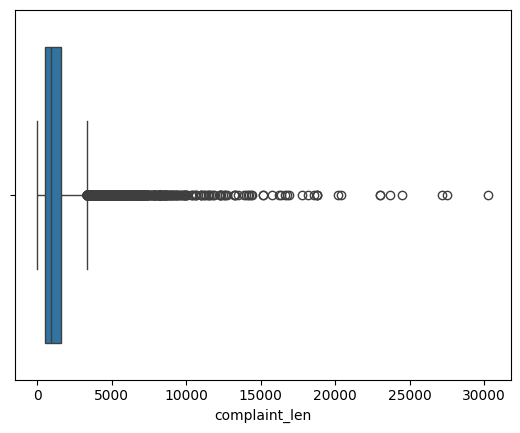

In [ ]:
# visulaize the len
sns.boxplot(df_clean['complaint_len'], orient='h')
plt.show()

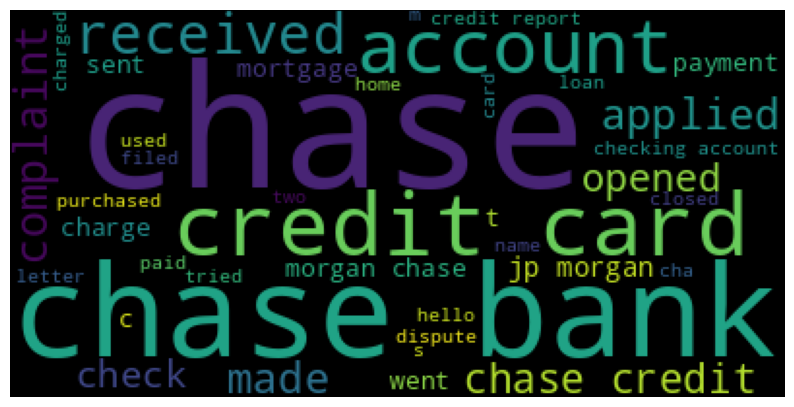

In [ ]:
# wordcloud to find top 40 words

from wordcloud import WordCloud

wordcloud = WordCloud(max_words=40).generate(str(df_clean['complaint_text']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# UNIGRAM, BIGRAM, TRIGRAMS

In [ ]:
# Function to control n grams

def get_top_ngrams(text, n_gram=1, top=None):
    vec = CountVectorizer(ngram_range=(n_gram, n_gram), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)

    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top]

In [ ]:
# generate the ngrams
top_30_unigram = get_top_ngrams(df_clean['complaint_pos_retained'], top=30)
top_30_bigram = get_top_ngrams(df_clean['complaint_pos_retained'], n_gram=2, top=30)
top_30_trigram = get_top_ngrams(df_clean['complaint_pos_retained'], n_gram=3, top=30)

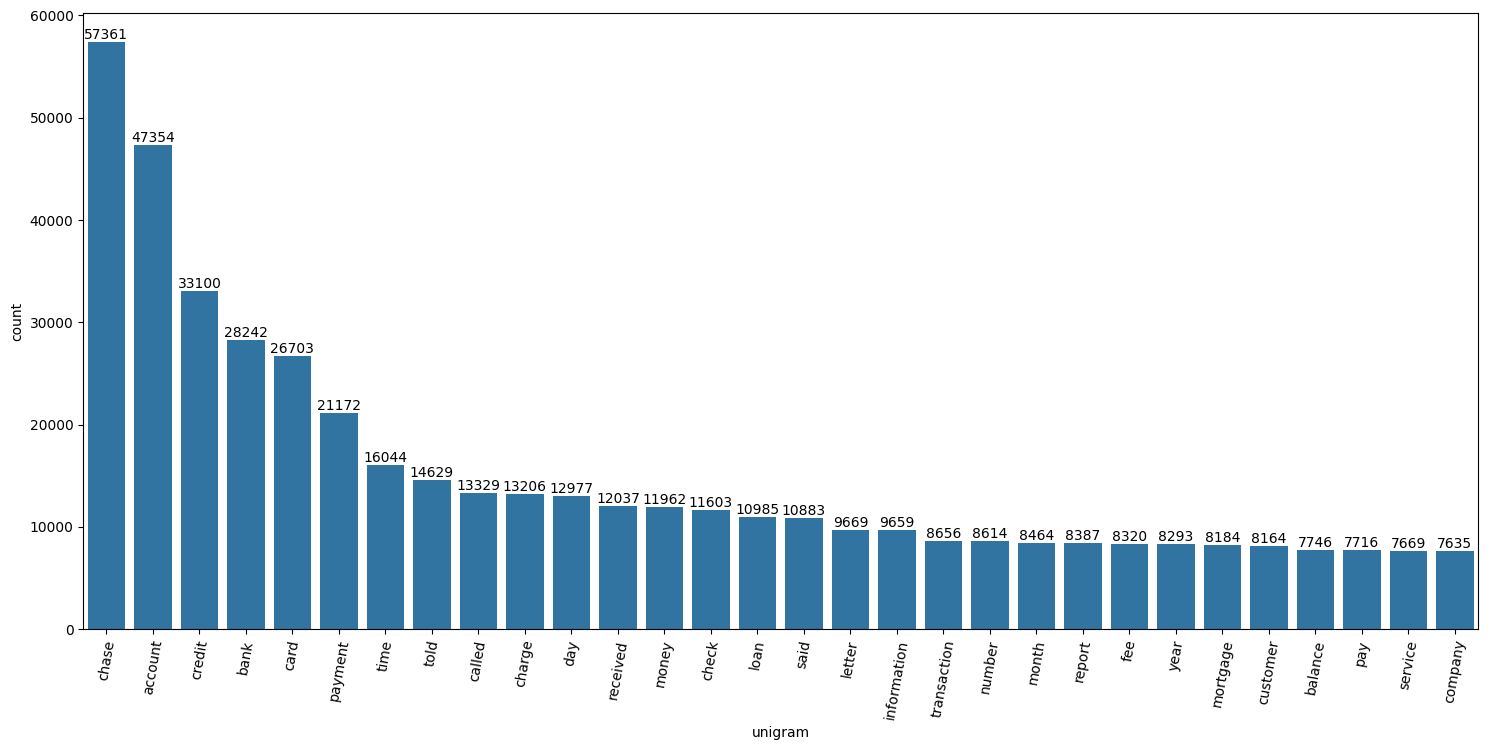

In [ ]:
# plotting the graph for the unigram
df1 = pd.DataFrame(top_30_unigram, columns=['unigram', 'count'])
plt.figure(figsize=(18, 8))
fig = sns.barplot(x=df1['unigram'], y=df1['count'])
fig.bar_label(fig.containers[0])
plt.xticks(rotation=80)
plt.show()

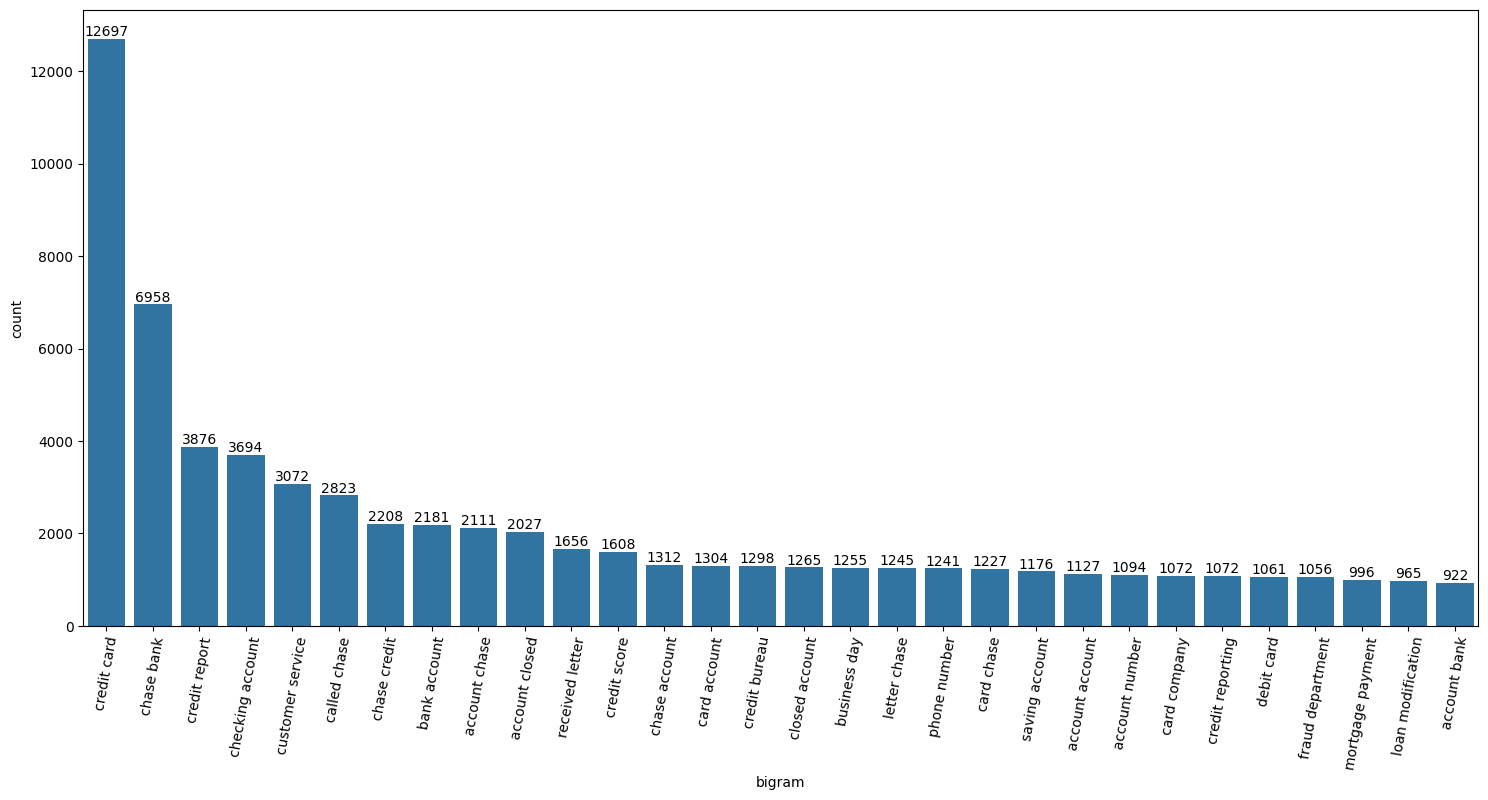

In [ ]:
# plotting the graph for the bigram
df1 = pd.DataFrame(top_30_bigram, columns=['bigram', 'count'])
plt.figure(figsize=(18, 8))
fig = sns.barplot(x=df1['bigram'], y=df1['count'])
fig.bar_label(fig.containers[0])
plt.xticks(rotation=80)
plt.show()

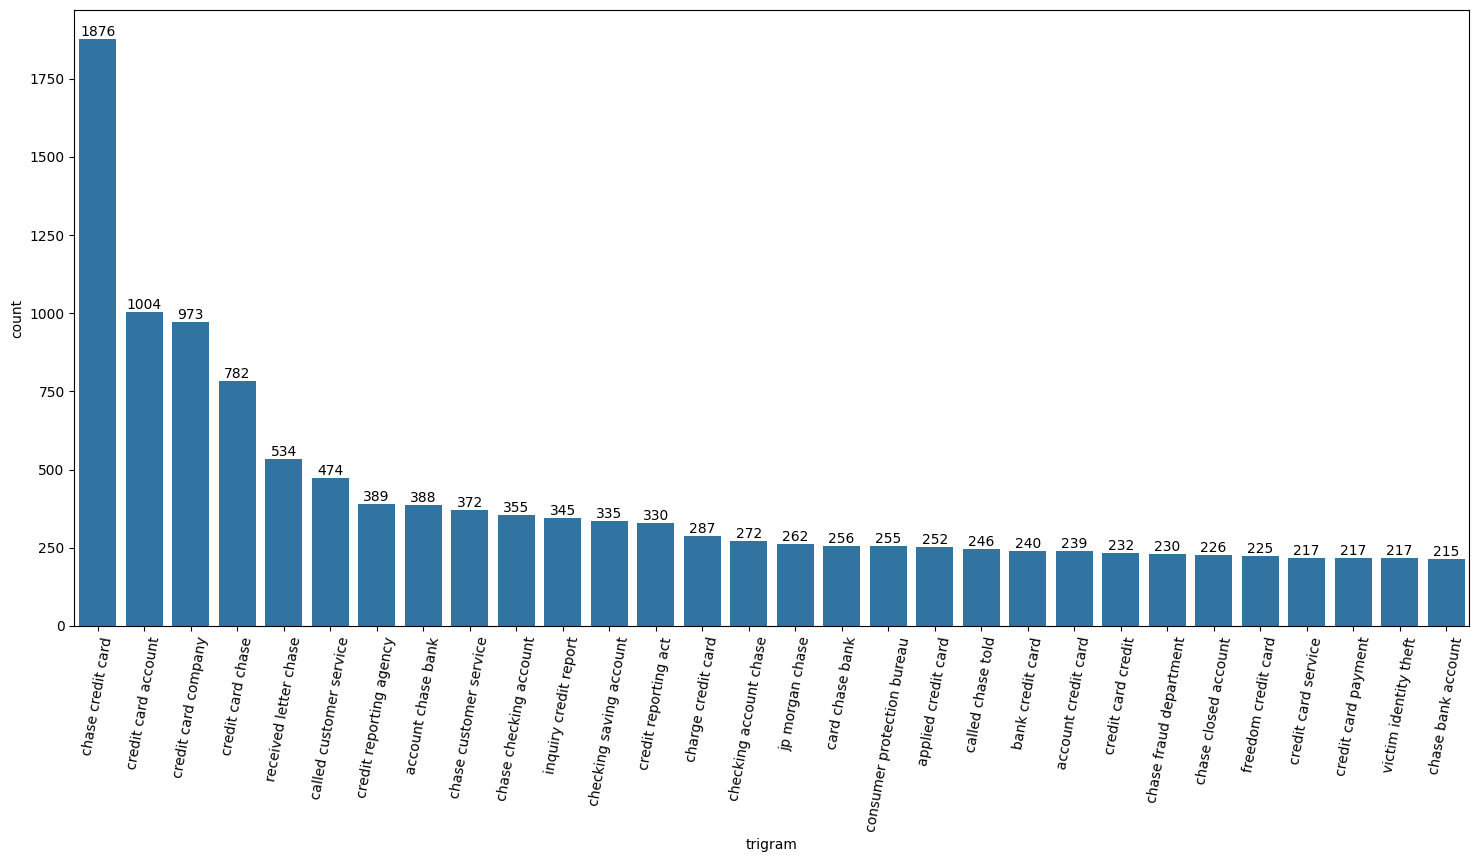

In [ ]:
# plotting the graph for the trigram
df1 = pd.DataFrame(top_30_trigram, columns=['trigram', 'count'])
plt.figure(figsize=(18, 8))
fig = sns.barplot(x=df1['trigram'], y=df1['count'])
fig.bar_label(fig.containers[0])
plt.xticks(rotation=80)
plt.show()

In [ ]:
# converting the raw text to tfidf matrix
tfidf = TfidfVectorizer(stop_words='english')
dtm = tfidf.fit_transform(df_clean.complaint_pos_retained)

# Topic Modelling

## **Topic Modelling using NMF**

- ### **Non-Negative Matrix Factorization (NMF)**
It is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

- In this task we are performing the following:

 * Find the best number of clusters
 * Apply the best number to create word clusters
 * Inspect & validate the correction of each cluster wrt the complaints
 * Correct the labels if needed
 * Map the clusters to topics/cluster names

In [ ]:
# importing the NMF
from sklearn.decomposition import NMF

In [ ]:
# Manual topic modelling - trail & error method

# n_components for the model (as per business requirements we need 5 groups)
num_topics = 5

# nmf
nmf_model = NMF(n_components=num_topics, random_state=42)

W1 = nmf_model.fit_transform(dtm)
H1 = nmf_model.components_

In [ ]:
# printing the top 15 words from each topic
num_words = 15

vocab = np.array(tfidf.get_feature_names_out())

top_words = lambda t: [vocab[i] for i in np.argsort(t)][:-num_words-1:-1]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [ ]:
# topic summary

topics

# * Credit card / Prepaid card - 1
# * Bank account services - 0
# * Theft/Dispute reporting - 3
# * Mortgages/loans - 2
# * Others - 4

['account bank check money chase fund checking deposit closed told branch day said called business',
 'credit card report inquiry account chase reporting score company bureau debt limit closed information application',
 'loan mortgage chase home modification property year letter rate bank time house sale foreclosure document',
 'charge card chase transaction dispute claim fraud merchant fee purchase called charged received service told',
 'payment balance fee month paid pay statement day chase time auto date charged account credit']

In [ ]:
# create the best topic for each complaint in terms of interger value 0, 1, 2, 3, 4

colnames = ['Topic_' + str(i) for i in range(nmf_model.n_components_)]
docnames = ['Doc_' + str(i) for i in range(len(df_clean.complaint_pos_retained))]
df_doc_topic = pd.DataFrame(np.round(W1, 3), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic
df_doc_topic.head()

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,dominant_topic
Doc_0,0.019,0.012,0.025,0.011,0.006,2
Doc_1,0.009,0.013,0.005,0.014,0.003,3
Doc_2,0.000,0.043,0.003,0.007,0.000,1
Doc_3,0.017,0.054,0.020,0.013,0.000,1
Doc_4,0.080,0.000,0.004,0.004,0.002,0


In [ ]:
# assign the best topic to each of the complain in topic column
df_clean['topic'] = significant_topic

# data sample
df_clean.head()

,complaint_text,lemma,category,complaint_pos_retained,complaint_len,topic
1,good morning my name is and i appreciate it ...,good morning appreciate help stop chase bank c...,Debt collection+Credit card debt,morning appreciate help stop chase bank cardme...,451,2
2,i upgraded my card in and was told by the a...,upgraded card told agent upgrade anniversary d...,Credit card or prepaid card+General-purpose cr...,card told agent date change turned giving info...,305,3
10,chase card was reported on however fraudulent...,chase card reported fraudulent application sub...,"Credit reporting, credit repair services, or o...",chase card reported application submitted iden...,210,1
11,on while trying to book a ticket i came a...,trying book ticket came offer applied ticket a...,"Credit reporting, credit repair services, or o...",trying book ticket came offer applied ticket a...,1417,1
14,my grand son give me check for i deposit it i...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account,son check deposit chase account fund chase ban...,448,0


In [ ]:
# Manual topic mapping

# Credit card / Prepaid card - 1
# Bank account services - 0
# Theft/Dispute reporting - 3
# Mortgages/loans - 2
# Others - 4

topic_mapping = {
    0: 'Bank account services',
    1: 'Credit card / Prepaid card',
    2: 'Mortgages/loans',
    3: 'Theft/Dispute reporting',
    4: 'Others'
}

# create a topic name column
df_clean['Topic_Name'] = df_clean['topic'].map(topic_mapping)

# data sample
df_clean.head()

,complaint_text,lemma,category,complaint_pos_retained,complaint_len,topic,Topic_Name
1,good morning my name is and i appreciate it ...,good morning appreciate help stop chase bank c...,Debt collection+Credit card debt,morning appreciate help stop chase bank cardme...,451,2,Mortgages/loans
2,i upgraded my card in and was told by the a...,upgraded card told agent upgrade anniversary d...,Credit card or prepaid card+General-purpose cr...,card told agent date change turned giving info...,305,3,Theft/Dispute reporting
10,chase card was reported on however fraudulent...,chase card reported fraudulent application sub...,"Credit reporting, credit repair services, or o...",chase card reported application submitted iden...,210,1,Credit card / Prepaid card
11,on while trying to book a ticket i came a...,trying book ticket came offer applied ticket a...,"Credit reporting, credit repair services, or o...",trying book ticket came offer applied ticket a...,1417,1,Credit card / Prepaid card
14,my grand son give me check for i deposit it i...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account,son check deposit chase account fund chase ban...,448,0,Bank account services


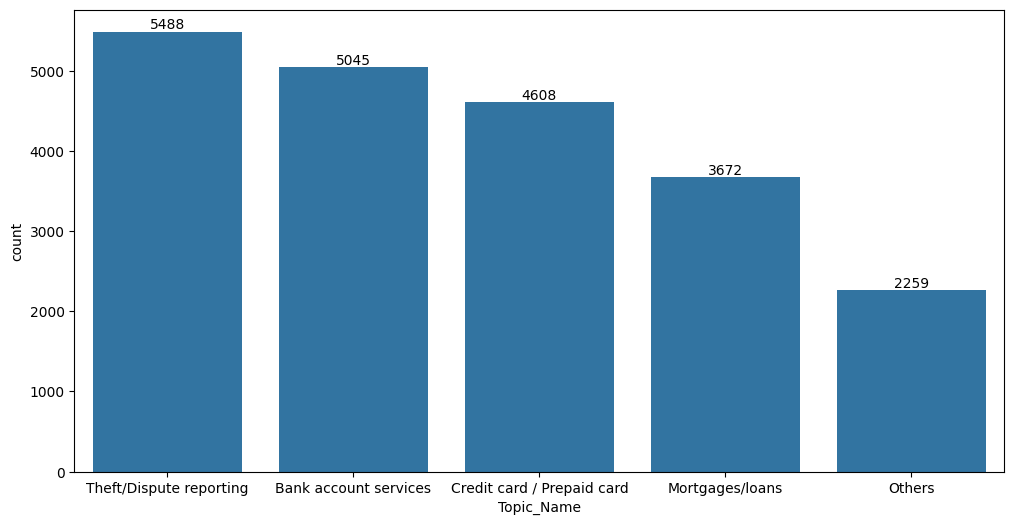

In [ ]:
# Lets check if there is any class imbalance / check the target distribution

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Topic_Name', data=df_clean, order=df_clean['Topic_Name'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

# Preprocessing for the supervised model

In [ ]:
# data sample
df_clean.head()

,complaint_text,lemma,category,complaint_pos_retained,complaint_len,topic,Topic_Name
1,good morning my name is and i appreciate it ...,good morning appreciate help stop chase bank c...,Debt collection+Credit card debt,morning appreciate help stop chase bank cardme...,451,2,Mortgages/loans
2,i upgraded my card in and was told by the a...,upgraded card told agent upgrade anniversary d...,Credit card or prepaid card+General-purpose cr...,card told agent date change turned giving info...,305,3,Theft/Dispute reporting
10,chase card was reported on however fraudulent...,chase card reported fraudulent application sub...,"Credit reporting, credit repair services, or o...",chase card reported application submitted iden...,210,1,Credit card / Prepaid card
11,on while trying to book a ticket i came a...,trying book ticket came offer applied ticket a...,"Credit reporting, credit repair services, or o...",trying book ticket came offer applied ticket a...,1417,1,Credit card / Prepaid card
14,my grand son give me check for i deposit it i...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account,son check deposit chase account fund chase ban...,448,0,Bank account services


In [ ]:
# retain only the data that is needed for training
model_data = df_clean[['complaint_text', 'topic']]

# data sample
model_data.head()

,complaint_text,topic
1,good morning my name is and i appreciate it ...,2
2,i upgraded my card in and was told by the a...,3
10,chase card was reported on however fraudulent...,1
11,on while trying to book a ticket i came a...,1
14,my grand son give me check for i deposit it i...,0


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(model_data.complaint_text, model_data.topic, test_size=0.2, random_state=42)

In [ ]:
# vector transforming
vectorizer = TfidfVectorizer(stop_words='english')
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

In [ ]:
# Importing the classification models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

In [ ]:
# function for gridsearch combination
def grid_search(model, folds, params, scoring):
    grid_search = GridSearchCV(model,
                               cv=folds,
                               param_grid=params,
                               scoring=scoring,
                               n_jobs=-1, verbose=1)
    return grid_search

# utility function to display the best score
def print_best_scores(model):
    print('Best Score: ', model.best_score_)
    print('Best Hyperparameters: ', model.best_params_)

# function for metic validation
def print_metrics(model):
    y_pred = model.predict(x_test_tfidf)
    print('Training Accuracy:', round(model.score(x_train_tfidf, y_train)*100, 2), '%')
    print('Testing Accuracy:', round(accuracy_score(y_pred, y_test)*100, 2), '%')
    cm = ConfusionMatrixDisplay.from_predictions(y_pred, y_test)
    print('Classiciation Report:\n\n', classification_report(y_pred, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Score:  0.7906508060341627
Best Hyperparameters:  {'alpha': 0.1}
Training Accuracy: 88.35 %
Testing Accuracy: 80.14 %
Classiciation Report:

               precision    recall  f1-score   support

           0       0.84      0.78      0.81      1084
           1       0.80      0.80      0.80       949
           2       0.89      0.84      0.87       730
           3       0.83      0.78      0.80      1181
           4       0.52      0.86      0.65       271

    accuracy                           0.80      4215
   macro avg       0.78      0.81      0.79      4215
weighted avg       0.82      0.80      0.81      4215



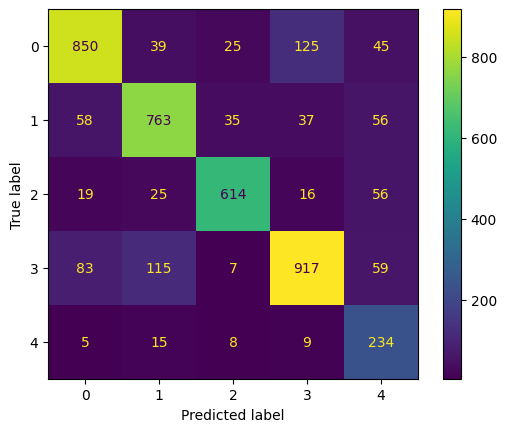

In [ ]:
# Naive bayes model

mnb_model = MultinomialNB()

mnb_params = {'alpha': (1, 0.1, 0.001)}

# creating folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# create a gridsearch object
grid_search_mnb = grid_search(mnb_model, folds, mnb_params, None)

# fit model
grid_search_mnb.fit(x_train_tfidf, y_train)

# best hyper parameter and score
print_best_scores(grid_search_mnb)

# metrics
print_metrics(grid_search_mnb)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Score:  0.9563980050342167
Best Hyperparameters:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Training Accuracy: 99.95 %
Testing Accuracy: 95.87 %
Classiciation Report:

               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1027
           1       0.96      0.96      0.96       952
           2       0.97      0.98      0.97       683
           3       0.96      0.95      0.95      1112
           4       0.94      0.96      0.95       441

    accuracy                           0.96      4215
   macro avg       0.96      0.96      0.96      4215
weighted avg       0.96      0.96      0.96      4215



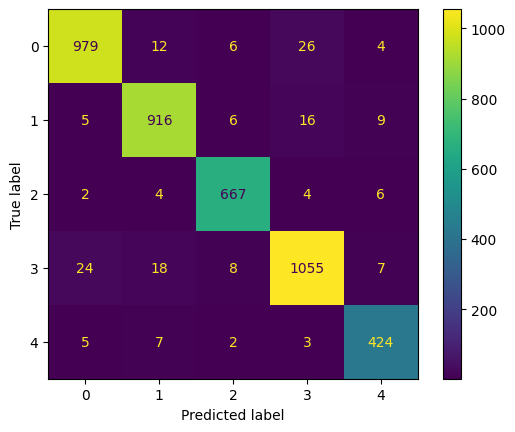

In [ ]:
# logistic regression model

log_reg = LogisticRegression()

log_reg_params = {'C': [0.01, 1, 10],
                  'penalty': ['l1', 'l2'],
                  'solver': ['liblinear', 'saga', 'newton-cg']}

# creating folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# create a gridsearch object
grid_search_logreg = grid_search(log_reg, folds, log_reg_params, None)

# fit model
grid_search_logreg.fit(x_train_tfidf, y_train)

# best hyper parameter and score
print_best_scores(grid_search_logreg)

# metrics
print_metrics(grid_search_logreg)

In [ ]:
# # Decision Tree model

# tree_model = DecisionTreeClassifier()

# tree_params = {'max_depth': [5, 10, 20, 30],
#                'min_samples_leaf': [2, 4, 6, 8]}

# # creating folds
# folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # create a gridsearch object
# grid_search_tree = grid_search(tree_model, folds, tree_params, None)

# # fit model
# grid_search_tree.fit(x_train_tfidf, y_train)

# # best hyper parameter and score
# print_best_scores(grid_search_tree)

# # metrics
# print_metrics(grid_search_tree)


Training Accuracy: 99.7 %
Testing Accuracy: 95.9 %
Classiciation Report:

               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1026
           1       0.96      0.96      0.96       950
           2       0.97      0.98      0.97       683
           3       0.96      0.95      0.95      1117
           4       0.94      0.96      0.95       439

    accuracy                           0.96      4215
   macro avg       0.96      0.96      0.96      4215
weighted avg       0.96      0.96      0.96      4215



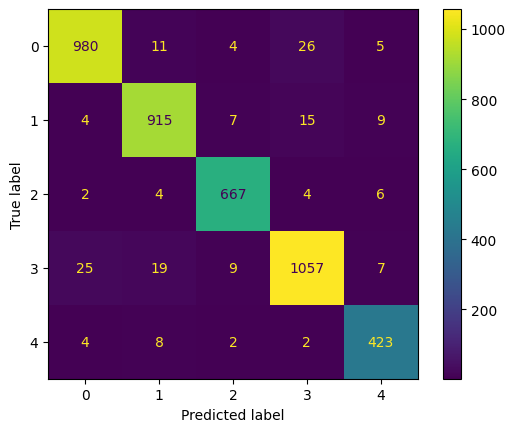

In [ ]:
# Final Model - Logistic Regression

# building final model
final_model = LogisticRegression(C= 5, penalty= 'l1', solver = 'saga')
final_model.fit(x_train_tfidf, y_train)

# final model metrics
print_metrics(final_model)

In [ ]:
# predict the incoming complaint

def predict_ticket_class():
    # user input
    cmnt = input('Enter your ticket complaint: ')
    # convert input to series
    input_cmnt = pd.Series(cmnt.split(','))
    # preprocessing
    input_cmnt_tfidf = vectorizer.transform(input_cmnt)
    # prediction
    output = final_model.predict(input_cmnt_tfidf)
    # topic mapping
    topic_mapping = {
        0: 'Bank account services',
        1: 'Credit card / Prepaid card',
        2: 'Mortgages/loans',
        3: 'Theft/Dispute reporting',
        4: 'Others'}
    # print the output
    print('\nThis ticket is mapped under:', topic_mapping[output[0]])

In [ ]:
# prediction
predict_ticket_class()

Enter your ticket complaint: I want to extend my loan tenure after the intrerest rate cut and repo rate change

This ticket is mapped under: Mortgages/loans


In [ ]:
# prediction
predict_ticket_class()

Enter your ticket complaint: My credit card is missing and I doubt it might be taken by someone. Dont approve any transactions without my knowledge.

This ticket is mapped under: Credit card / Prepaid card


In [ ]:
# prediction
predict_ticket_class()

Enter your ticket complaint: I want to open a joint account for my family members

This ticket is mapped under: Bank account services


In [ ]:
# prediction
predict_ticket_class()

Enter your ticket complaint: My gold and other valuables are stolen from the banker locker

This ticket is mapped under: Mortgages/loans


In [ ]:
# data for theft / dispute
df_clean[df_clean['Topic_Name'] == 'Theft/Dispute reporting']['complaint_text'].loc[78291]

'my  account was hacked during   i did not notice it until i received a   on monday  which was not ordered by me someone used my chase credit card saved on  account to make the order \n\ni had reported this unauthorized transaction to both chase and  right after i found it out in the morning of  but so far it is not solved and chase decided that i should be responsible for the    for the computer  for shipping  billed by  \n\nduring my first conversations with chase on  on   told me that since the item was sold by a third party seller using their platform they are not responsible for return  suggest that i consult chase for further action chase replaced my credit card and also told me that i should not be responsible for the  \n\nin the package i received there was no shipping receipt there is only the shipper s information on the outside of the box which is a private person s last name first name initial address and a phone number i called the number nobody answered \n\nso i have to w